## First Class 

### Question 1<br>
How do you handle duplicate values in a dataset in Python?

In [ ]:
# remove all duplicates value except first one
df = df.drop_duplicates(keep="first", inplace=True)

### Question 2<br>
You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 

In [ ]:
# python solution
# assume one request_accepted record would most have only one friend_request to match
# that means excluding situation that one accept record could have multiple request records  

# merge to get all the records related to request table
df_temp = df_request.merge(df_accept, how='left')

# rename coloumn
df_temp.columns = ['requester_id', 'time1', 'sent_to_id', 'time2', 'acceptor_id', 'requestor_id']

# create mask to filter out unqualified records
mask = (df_temp.requester_id == df_temp.requestor_id) 
        and (df_temp.sent_to_id == df_temp.acceptor_id)
        and (df_temp.time1 == df.time2)
        
# get target df
df_target = df_temp.ix[maks,:]

# overall acceptance rate
accept_rate = len(df_target)/len(df_request) * 1.0

### Question 3<br>
Do some research and summarize the business model of your dream company, or company that you interview with.
What is the product?
Who are the customer?
How do they make money?
Why do you want to work for this company?
(Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?


<b>Company</b>: <br>Facebook<br>
<b>What is the product:</b> <br>Facebook's targeted advertising<br>
<b>Who are the customer:</b><br> Group or individual who would like to reach their targeted  customer<br>
<b>How do they make money: </b><br>Revenue from advertising<br>
<b>Why do you want to work for this company:</b><br> To maximize its advertising effect and accurately make advertising for customers, Facebook has to understand its users(not customers) from users behavior such as what are they said, what are they posted, what are they followed, what are they liked and so on. Because of that, Facebook needs data analyst or business analyst to keep its product in a reasonable performance level. As a data analyst or bueinss analyst in Facebook, I could get a opportunity to maximize my value.  

## Second Class

### Question 1<br>
Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:
 
The function takes three inputs:
* experiment_id
* country
* vertical
 
The function produces two outputs:
* A time series chart showing the cumulative uplift (hint: search for cumsum)
* Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %


In [39]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# import data
file_name = 'orders_new.csv'
my_data = pd.read_csv(file_name)

In [31]:
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [38]:
# test code
my_country = 'US'
my_id = 12624549
my_vertical = 'ANDROID_APPS'
mask = (my_data.country == my_country) & (my_data.experiment_id == my_id) & (my_data.vertical == my_vertical)
temp = my_data.ix[mask,['date','spend_usd']]
temp.groupby('date')['spend_usd'].sum()
temp_plot = temp.groupby('date')['spend_usd'].sum().cumsum()
temp_plot

date
2017-04-01     18826.945113
2017-04-02     33894.437889
2017-04-03     47270.906778
2017-04-04     60597.319723
2017-04-05     75427.961912
2017-04-06     93143.172837
2017-04-07    111053.627316
Name: spend_usd, dtype: float64

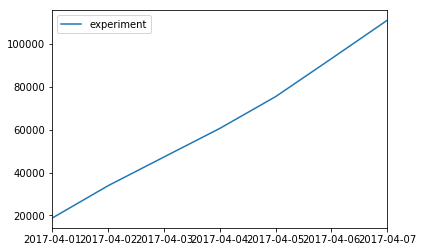

In [45]:
# test code
df = pd.DataFrame(
    {
        'experiment': temp_plot.tolist()
    },
    index = temp_plot.index.tolist(),
    columns = ['experiment']
)
df.plot()

In [33]:
def GetSeries(df, my_id, my_country, my_vertical):
    mask = (df.country == my_country) & (df.experiment_id == my_id) & (df.vertical == my_vertical)
    temp = df.ix[mask,['date','spend_usd']]
    series = temp.groupby('date')['spend_usd'].sum().cumsum()
    return(series)

In [40]:
def PlotSeries(index_series, experiment_series):
    df = pd.DataFrame(
        {
            'experiment': experiment_series.tolist()
        },
        index = index_series.tolist(),
        columns = ['experiment']
    )
    df.plot()

In [43]:
def PrintCumulativeTimeSeries(df, my_id, my_country, my_vertical):
    data_series = df.date
    index_series = np.unique(data_series)
    index_series = np.sort(index_series)
    
    df = df.sort_values('date', ascending=True, inplace=False)
    experiment_series = GetSeries(df, my_id, my_country, my_vertical)
    PlotSeries(index_series, experiment_series)

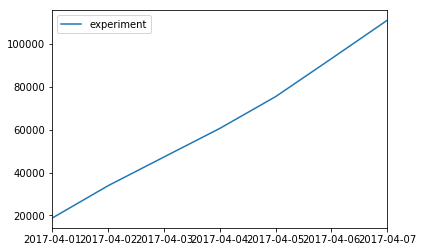

In [44]:
PrintCumulativeTimeSeries(my_data, 12624549, 'US', 'ANDROID_APPS')

### Question 2<br>
Using our data, draw a histogram which plots both US and JP data on the same plot.

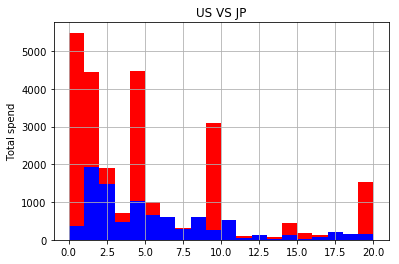

In [49]:
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

fig, ax = plt.subplots()

ax.hist(my_series_us, bins=20, color='red', label='us')
ax.hist(my_series_jp, bins=20, color='blue', label='jp')

ax.set_title('US VS JP')
ax.set_ylabel("Total spend")
ax.grid(True, which="both")


### Question 3<br>
Write a function that can plot 10 (instead of 2) time series in our data

Solution Idea: <br>
write a for loop in PrintCumulativeTimeSeries() to identify how long the input list is and take each of series with GetSeries().